<a href="https://colab.research.google.com/github/Shuregg/math-modeling-with-py/blob/dev/control_theory_lab_3_systems_characteristics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Aperiodic system


L(1/T) = -23.010299956639813


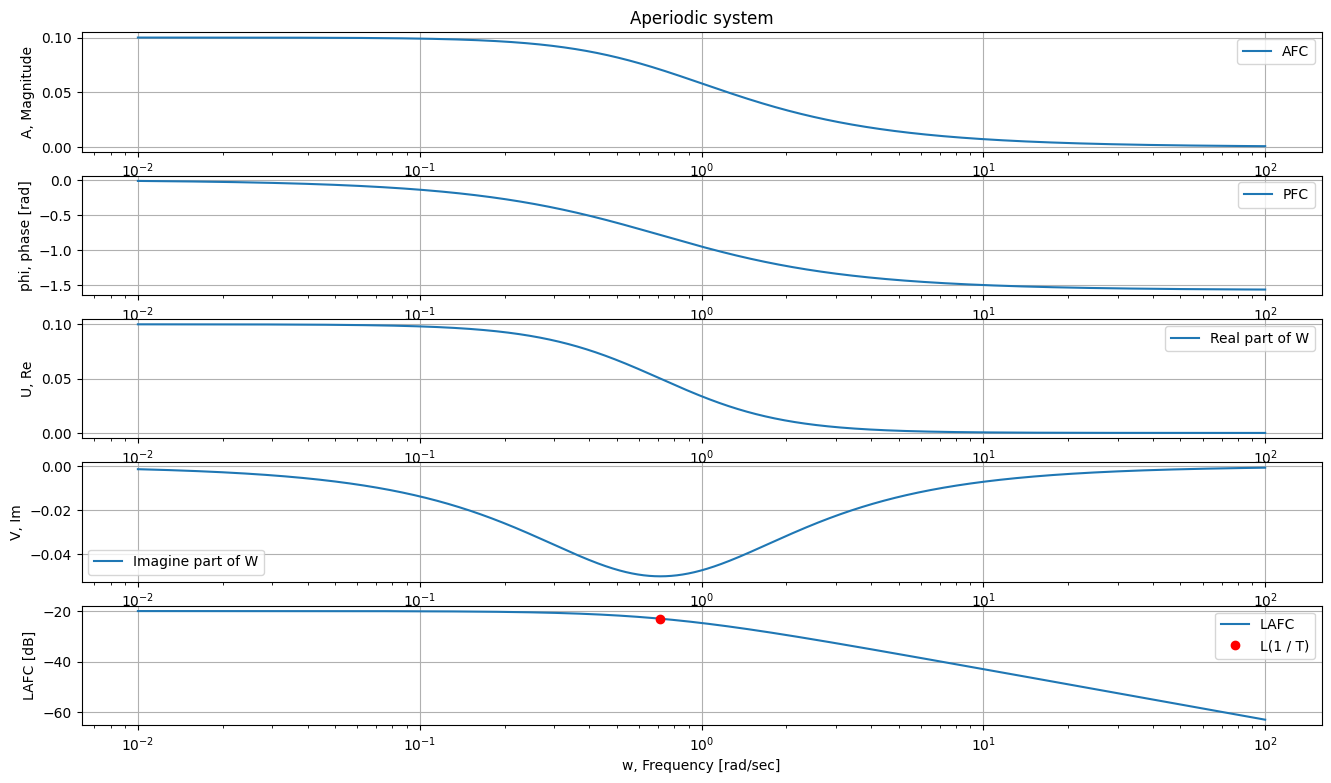

In [20]:
# How phi(w) and L(w) depends on T?
# A(w), phi(w), U(w), V(w), L(w)

# W(s) = k / (T * s + 1)
# s = j*w

import numpy as np
import matplotlib.pyplot as plt

# Inital parameters
T = 1.4
k = 0.1

# Frequency
w_range = [10e-3, 10e1]
w = np.linspace(w_range[0], w_range[1], 1000000)

# Algebraic form of complex transfer characteristic W(jw) = (U(w) + j * V(w))
U_1 = k / ((T * w)**2 + 1)
V_1 = - (k * T * w) / ((T * w)**2 + 1)

# Frequency response (amplitude-frequency characteristic, AFC)
A_1 = k / (np.sqrt((T * w)**2 + 1))

# Phase frequency response
phi_1 = -np.arctan(w * T)

# Logarifmic AFC
L_1 = 20 * np.log10(A_1)

w0 = 1 / T
L_w0 = 20 * np.log10(k) - 20 * np.log10(np.sqrt((T * w0)**2 + 1))
print(f'L(1/T) = {L_w0}')

fig, ax = plt.subplots(5, 1, figsize=(16, 9))

ax[0].semilogx(w, A_1, label='AFC')
ax[0].set_xlabel("w, frequency [rad/sec]")
ax[0].set_ylabel("A, Magnitude")
ax[0].set_title("Aperiodic system")

ax[1].semilogx(w, phi_1, label='PFC')
ax[1].set_xlabel("w, Frequency [rad/sec]")
ax[1].set_ylabel("phi, phase [rad]")
# ax[4].set_xscale("linear")

ax[2].semilogx(w, U_1, label='Real part of W')
ax[2].set_xlabel("w, Frequency [rad/sec]")
ax[2].set_ylabel("U, Re")

ax[3].semilogx(w, V_1, label='Imagine part of W')
ax[3].set_xlabel("w, Frequency [rad/sec]")
ax[3].set_ylabel("V, Im")

ax[4].semilogx(w, L_1, label='LAFC')
ax[4].plot(w0, L_w0, 'ro', label='L(1 / T)')
ax[4].set_xlabel("w, Frequency [rad/sec]")
ax[4].set_ylabel("LAFC [dB]")
# ax[4].set_xscale("log")

for i in range(len(ax)):
    ax[i].grid(True)
    # ax[i].set_xscale("log")
    ax[i].legend()

plt.show()


## 2. Oscillating system

Text(0, 0.5, 'LAFC [dB]')

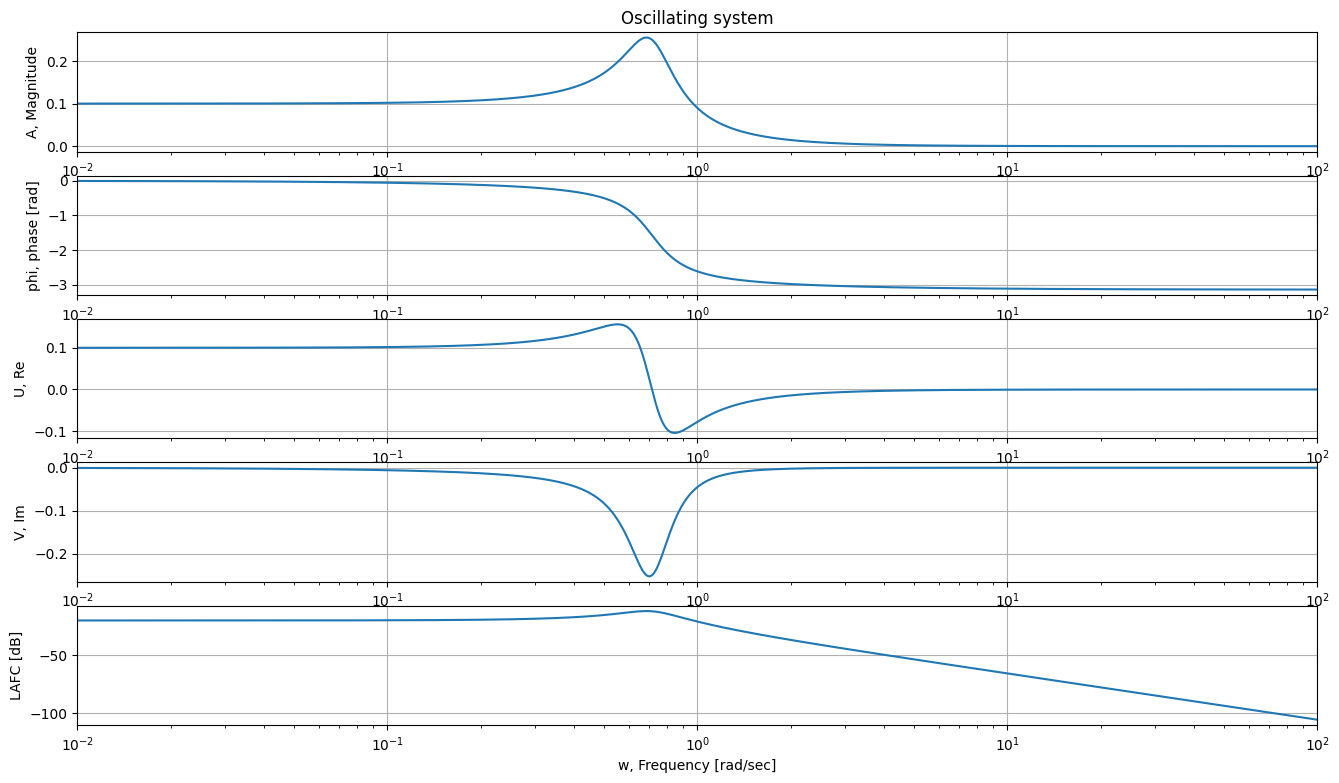

In [14]:
# Inital parameters
T = 1.4
T1 = T
T2 = 0.35
k = 0.1
xi = 0.2

w_range = [10e-3, 10e1]

w = np.linspace(w_range[0], w_range[1], 100000)

# 0 < Xi < 1
# W_wj = k / ((1 - (T * w)**2) + 2j * xi * T * w)
U_2 = (k * (1 - (T*w)**2)) / ((1 - (T * w)**2)**2 + (2 * xi * T * w)**2)
V_2 = (-2 * k * xi * T * w) / ((1 - (T * w)**2)**2 + (2 * xi * T * w)**2)

phi_lambda = lambda w: (-np.arctan((2 * xi * T * w) / (1 - (T*w)**2))) if (w <= 1/T) else (-np.pi - np.arctan((2 * xi * T * w)/(1 - (T*w)**2)))

phi_2 = [phi_lambda(val) for val in w]

A_2 = k / np.sqrt((1 - (T*w)**2)**2 + (2 * xi * T * w)**2)

L_2 = 20 * np.log10(k) - 20 * np.log10(np.sqrt((1 - (T*w)**2)**2 + (2 * xi * T * w)**2))

fig, ax = plt.subplots(5, 1, figsize=(16, 9))
for i in range(len(ax)):
    ax[i].grid(True)
    ax[i].set_xlim(w_range)
    # ax[i].set_xscale("log")

ax[0].semilogx(w, A_2)
ax[0].set_xlabel("w, frequency [rad/sec]")
ax[0].set_ylabel("A, Magnitude")
ax[0].set_title("Oscillating system")

ax[1].semilogx(w, phi_2)
ax[1].set_xlabel("w, Frequency [rad/sec]")
ax[1].set_ylabel("phi, phase [rad]")

ax[2].semilogx(w, U_2)
ax[2].set_xlabel("w, Frequency [rad/sec]")
ax[2].set_ylabel("U, Re")

ax[3].semilogx(w, V_2)
ax[3].set_xlabel("w, Frequency [rad/sec]")
ax[3].set_ylabel("V, Im")

ax[4].semilogx(w, L_2)
# ax[4].plot(w0, L_w0, 'ro', label='L(1 / T)')
ax[4].set_xlabel("w, Frequency [rad/sec]")
ax[4].set_ylabel("LAFC [dB]")
# ax[4].set_xscale("log")

## 3. LACH,  LPCH for a complex system
* Precise and asymptotic LACH
* LPFC of a typical systems, that included in this complex system

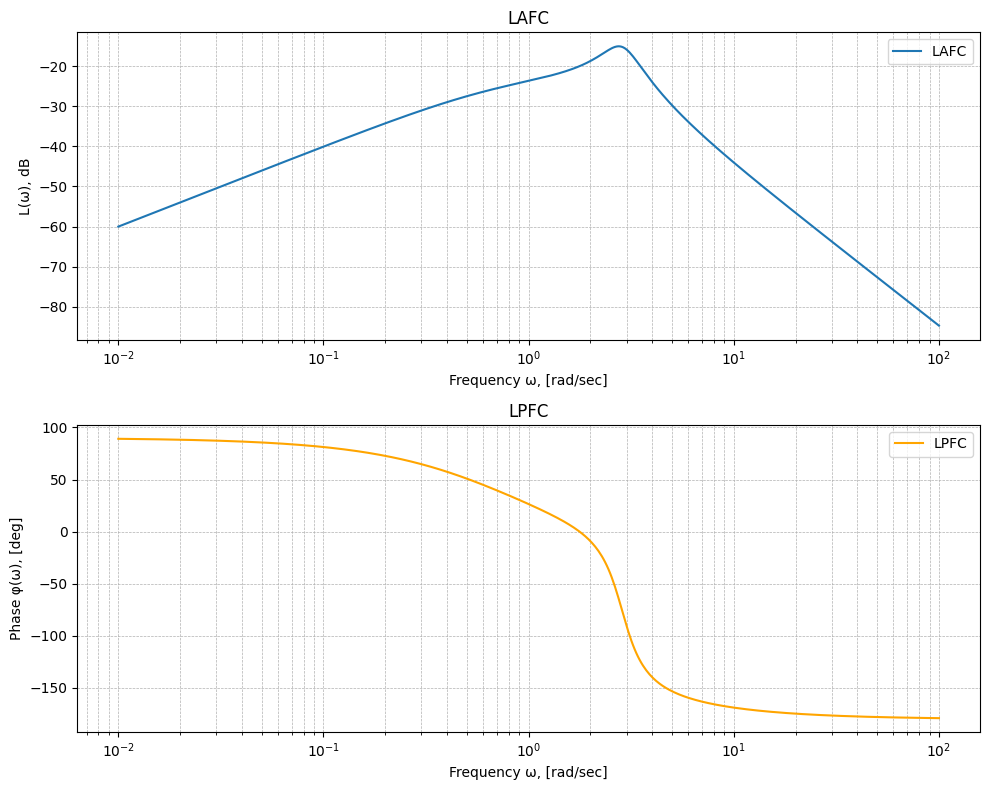

In [24]:
# W(p) = (k * p) / ( (T1 * p + 1) * ((T2*p)**2 + 2 * T2 * xi * p + 1) )

# W(jw) = (k * jw) / ( (T1 * jw + 1) * ((T2*jw)**2 + 2 * T2 * xi * jw + 1) )

import numpy as np
import matplotlib.pyplot as plt

# Параметры системы
# k = 1       # Amplify coeff
# T1 = 1      # Time const T1
# T2 = 1      # time const T2
# xi = 0.5    # demph coeff
T = 1.4
T1 = T
T2 = 0.35
k = 0.1
xi = 0.2
omega = np.logspace(-2, 2, 500)

num = k * 1j * omega
den = (T1 * 1j * omega + 1) * ((T2 * 1j * omega)**2 + 2 * T2 * xi * 1j * omega + 1)
W = num / den
U = np.real(W)
V = np.imag(W)

A = np.abs(W)
Phi = np.angle(W, deg=True)

# LAFC
L = 20 * np.log10(A)

fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# LAFC
ax[0].semilogx(omega, L, label="LAFC")
ax[0].set_title("LAFC")
ax[0].set_xlabel("Frequency ω, [rad/sec]")
ax[0].set_ylabel("L(ω), dB")
ax[0].grid(True, which="both", linestyle="--", linewidth=0.5)
ax[0].legend()

# LPFC
ax[1].semilogx(omega, Phi, label="LPFC", color="orange")
ax[1].set_title("LPFC")
ax[1].set_xlabel("Frequency ω, [rad/sec]")
ax[1].set_ylabel("Phase φ(ω), [deg]")
ax[1].grid(True, which="both", linestyle="--", linewidth=0.5)
ax[1].legend()

plt.tight_layout()
plt.show()

In [25]:
# # Асимптотическая ЛАЧХ
# # Задание переломных частот и наклонов
# break_frequencies = [1 / T1, 1 / T2]
# initial_gain_dB = 20 * np.log10(k)  # начальное усиление в дБ
# slopes = [20, -20, -40]  # наклоны для каждого частотного участка в дБ/дек

# # Функция для построения асимптотической ЛАЧХ
# def asymptotic_lachx(omega, break_frequencies, initial_gain_dB, slopes):
#     gain_dB = np.zeros_like(omega)
#     gain_dB.fill(initial_gain_dB)
#     current_slope = 0
#     last_break_idx = 0

#     for i, freq in enumerate(break_frequencies):
#         break_idx = np.searchsorted(omega, freq)
#         current_slope += slopes[i]
#         for j in range(last_break_idx, break_idx):
#             gain_dB[j] += current_slope * np.log10(omega[j] / omega[last_break_idx]) * 10
#         last_break_idx = break_idx

#     # Последний участок до конца диапазона частот
#     for j in range(last_break_idx, len(omega)):
#         gain_dB[j] += current_slope * np.log10(omega[j] / omega[last_break_idx]) * 10

#     return gain_dB

# # Расчёт асимптотической ЛАЧХ
# L_asymptotic = asymptotic_lachx(omega, break_frequencies, initial_gain_dB, slopes)

# # Построение графиков точной и асимптотической ЛАЧХ
# plt.figure(figsize=(10, 6))
# plt.semilogx(omega, L, label="Точная ЛАЧХ")
# plt.semilogx(omega, L_asymptotic, '--', label="Асимптотическая ЛАЧХ", color="red")
# plt.title("Сравнение точной и асимптотической ЛАЧХ")
# plt.xlabel("Частота ω, рад/с")
# plt.ylabel("L(ω), дБ")
# plt.grid(True, which="both", linestyle="--", linewidth=0.5)
# plt.legend()
# plt.show()

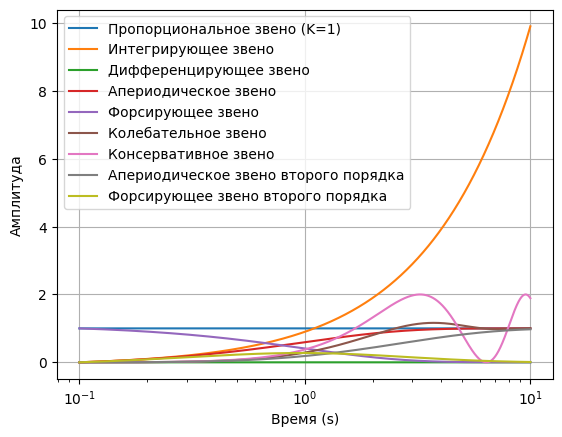

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lti, step

# Задаем время моделирования
t = np.linspace(10e-2, 10e+0, 100000)

# Функция для построения графиков
def plot_step_response(system, title):
    t_out, y_out = step(system, T=t)
    plt.semilogx(t_out, y_out, label=title)

# 1. Пропорциональное звено (K = 1)
K = 1
system_p = lti([K], [1])
plot_step_response(system_p, "Пропорциональное звено (K=1)")

# 2. Интегрирующее звено (K / s)
system_i = lti([K], [1, 0])
plot_step_response(system_i, "Интегрирующее звено")

# 3. Дифференцирующее звено (K*s): аналитическое решение
y_out = K * np.gradient(t)
plt.plot(t, y_out, label="Дифференцирующее звено")

# 4. Апериодическое звено (K / (T*s + 1))
T = 1  # Постоянная времени
system_ap = lti([K], [T, 1])
plot_step_response(system_ap, "Апериодическое звено")

# 5. Форсирующее звено (K*s / (T*s + 1))
system_f = lti([K, 0], [T, 1])
plot_step_response(system_f, "Форсирующее звено")

# 6. Колебательное звено (0 < xi < 1)
xi = 0.5  # Коэффициент затухания
omega_n = 1  # Собственная частота
system_os = lti([K*omega_n**2], [1, 2*xi*omega_n, omega_n**2])
plot_step_response(system_os, "Колебательное звено")

# 7. Консервативное звено (xi = 0)
xi = 0
system_cons = lti([K*omega_n**2], [1, 2*xi*omega_n, omega_n**2])
plot_step_response(system_cons, "Консервативное звено")

# 8. Апериодическое звено второго порядка (xi >= 1)
xi = 1.5
system_ap2 = lti([K*omega_n**2], [1, 2*xi*omega_n, omega_n**2])
plot_step_response(system_ap2, "Апериодическое звено второго порядка")

# 9. Форсирующее звено второго порядка (K*s / (T*s^2 + 2*xi*omega_n*s + omega_n^2))
system_f2 = lti([K, 0], [1, 2*xi*omega_n, omega_n**2])
plot_step_response(system_f2, "Форсирующее звено второго порядка")

# Отображение всех графиков
plt.xlabel("Время (s)")
plt.ylabel("Амплитуда")
plt.legend()
plt.grid(True)
plt.show()
